<a href="https://colab.research.google.com/github/anochima/Intro-to-CV/blob/master/Learning_Open_CV_(RGB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [3]:
# Import an RGB image to work with
def get_image(path, grayscale=False, mplt=False):
  """
  Display an RGB image
  Args:
    path: file path to image
    grayscale: if False image is displayed normal else image is turned to grayscale
    mplt: if true, image is displayed using the matplotlib library
  Returns:
    returns and image ndarray
  """
  image_tensor = cv2.imread(path, cv2.IMREAD_GRAYSCALE if grayscale == True else 1)
  plt.imshow(image_tensor) if mplt == True else cv2_imshow(image_tensor)
  return image_tensor

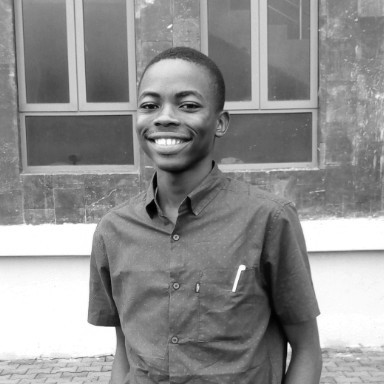

(384, 384)

In [4]:
gray_image = get_image('/content/drive/MyDrive/me.jpg', True)
gray_image.shape

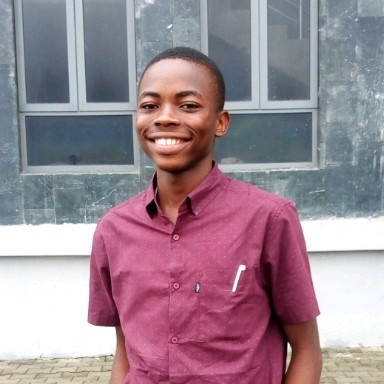

In [5]:
colored_image = image = get_image('/content/drive/MyDrive/me.jpg')
# Now due to openCV color channels are displayed as BGR instead of RGB lets flip the array to become RGB 😊
colored_image = colored_image[:,:,::-1]

In [6]:
colored_image.shape

(384, 384, 3)

`Colored` images are 3 dimensional while `Grayscale's` are 2 dimensional

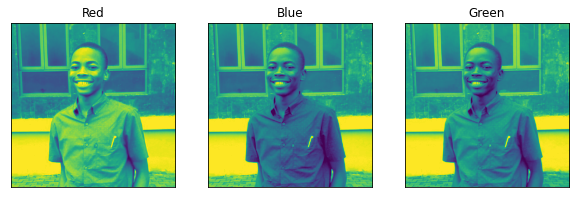

In [7]:
plt.figure(figsize=(10,7));

plt.subplot(131)
plt.imshow(colored_image[:,:,0])
plt.title('Red')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(colored_image[:,:,1])
plt.title('Blue')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(colored_image[:,:,2])
plt.title('Green')
plt.xticks([])
plt.yticks([]);

## Assignment: Create an image of 3 Dimensions showing BGR and another RGB

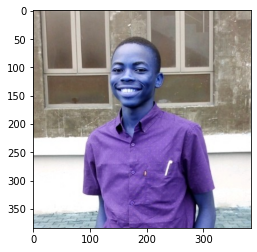

In [8]:
RGB = get_image('/content/drive/MyDrive/me.jpg', mplt=True)

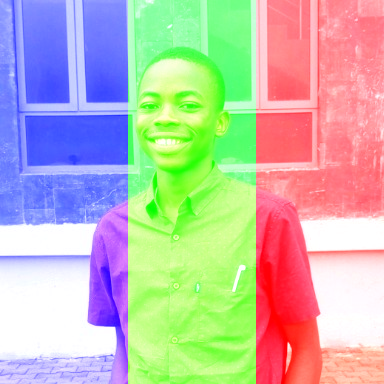

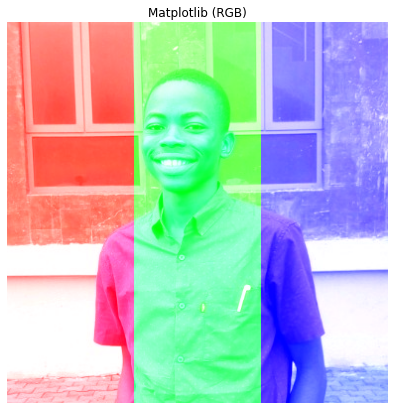

In [9]:
RGB[:,0:int(len(RGB)/3), 0] = 255 #Red Channel
RGB[:, int(len(RGB)/3):int(len(RGB)/3 *2), 1] = 255 # Green Channel
RGB[:, int(len(RGB)/3 *2):,2] = 255 # Blue Channel

#CV2 (BGR)
cv2_imshow(RGB)

plt.figure(figsize=(10, 7))
plt.title('Matplotlib (RGB)')
plt.imshow(RGB)
plt.axis('off');

## RGB TO HSV image conversion Algorithm

In [21]:
# Color Space

def rgb_to_hsv(R,G,B, scaleFactor):
  # scale values to be between 1 and 0 alias Normalization 
  R /= 255.0
  G /= 255.0
  B /= 255.0

  maxVal = max(R,G,B)
  minVal = min(R,G,B)
  diff = maxVal-minVal
  
  saturation = diff / maxVal * scaleFactor if not maxVal or minVal < 1 else 0

  if maxVal == R:
    hue = 60 * (0 + (G-B)/diff)
  elif maxVal == G:
    hue = 60 * (2+(B-R)/diff)
  else:
    hue = 60 * (4+(R-G)/diff)

  # hue += 360 if hue < 0 else hue

  value = maxVal * scaleFactor

  return hue, saturation, value


rgb_to_hsv(100,200,50, 100)


(100.0, 75.0, 78.43137254901961)

## Using the OpenCV builtin method for RGB to HSV conversion

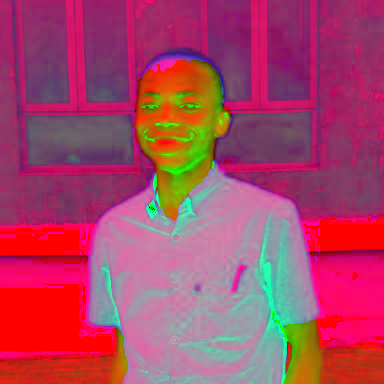

In [25]:
image = cv2.imread('/content/drive/MyDrive/me.jpg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_image)

## Now the question is **Why do we convert RGB to HSV**?
The HSV model describes colors similarly to how the human eye tends to perceive color. RGB defines color in terms of a combination of primary colors. In situations where color description plays an integral role, the HSV color model is often preferred over the RGB model.

source: [Quora](https://www.quora.com/Why-do-we-convert-RGB-to-HSV)

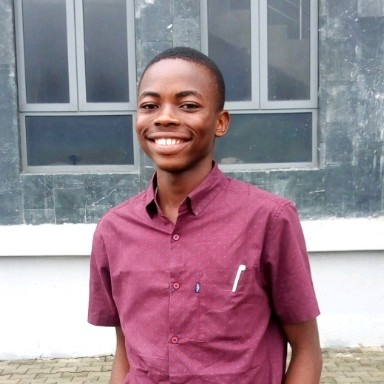

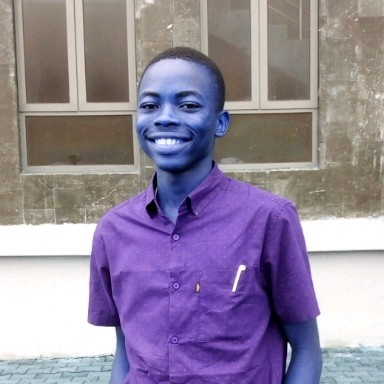

In [35]:
# Assignment: Convert HSV image back to RGB and BGR

rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
cv2_imshow(rgb_image)

bgr_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
cv2_imshow(bgr_image)
